In [11]:
# importing packages and data

import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

df = pd.read_csv("extended_features.csv")

# fill missed funding periods with 0
df["funding"] = df["funding"].fillna(0)

df = df[df.groupby('asset').cumcount() > 55].copy()
df = df.groupby('asset').head(-1).copy()

In [12]:
# creating funding signals

for i in [1, 3, 5, 10, 15, 25, 40, 55]:

    df[f"funding_sig{i}"] = df[f"funding_sma{i}"]

In [13]:
# create funding deciles
for i in [1, 3, 5, 10, 15, 25, 40, 55]:
    df[f"funding_decile{i}"] = 0
    df[f"funding_decile{i}_scaled"] = 0

    # per day deciles across all assets
    df[f'funding_decile{i}'] = df.groupby('timestamp')[f'funding_sig{i}'] \
        .transform(lambda x: pd.qcut(x.rank(method='first'), 10, labels=False))

# check df
unique_times = df["timestamp"].unique()
#print(unique_times)
print(df[df["timestamp"] == unique_times[0]])

                 timestamp         asset           open           high  \
56     2025-01-31 20:00:00  1000BONK-USD       0.024936       0.025613   
472    2025-01-31 20:00:00  1000PEPE-USD       0.014007       0.014258   
762    2025-01-31 20:00:00  1000SHIB-USD       0.018872       0.019227   
1411   2025-01-31 20:00:00       ADA-USD       0.945700       0.954300   
1852   2025-01-31 20:00:00       ARB-USD       0.649000       0.651800   
2271   2025-01-31 20:00:00      AVAX-USD      34.720000      35.070000   
2909   2025-01-31 20:00:00       BNB-USD     679.200000     681.400000   
3332   2025-01-31 20:00:00       BTC-USD  102375.600000  102753.100000   
3780   2025-01-31 20:00:00      DOGE-USD       0.327960       0.330150   
4475   2025-01-31 20:00:00       ETH-USD    3339.420000    3341.010000   
5021   2025-01-31 20:00:00      GOAT-USD       0.203700       0.207700   
6751   2025-01-31 20:00:00      LINK-USD      24.897000      25.905000   
7157   2025-01-31 20:00:00       LTC-U

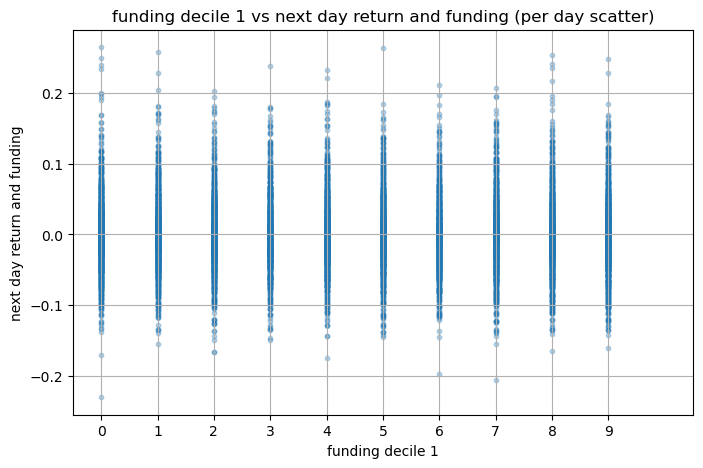

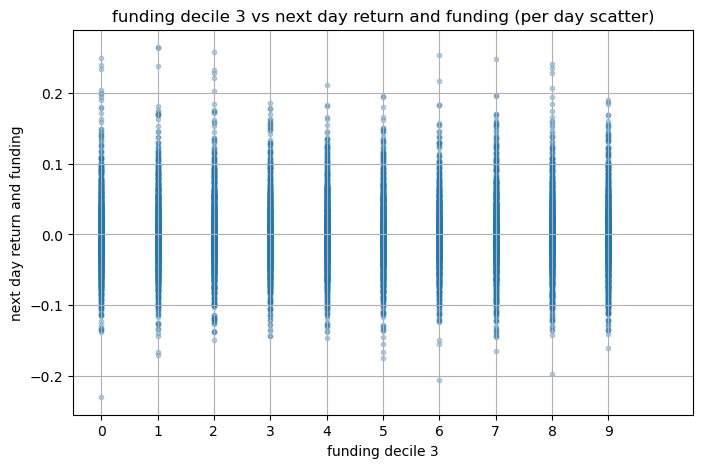

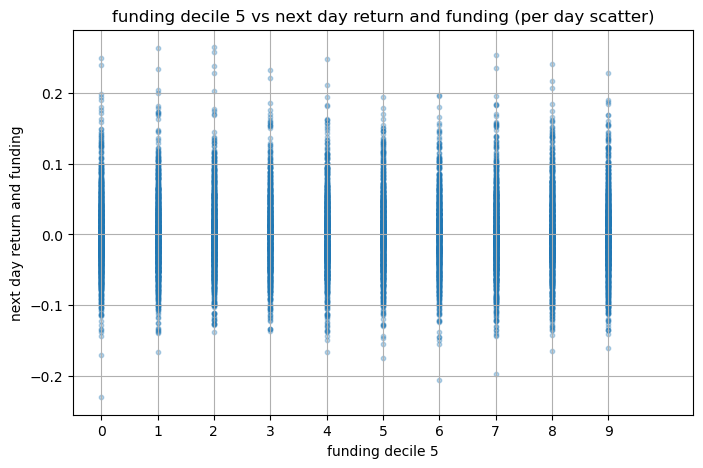

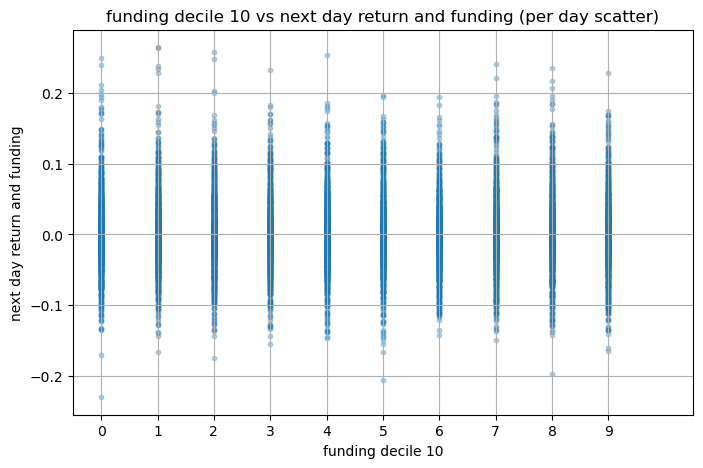

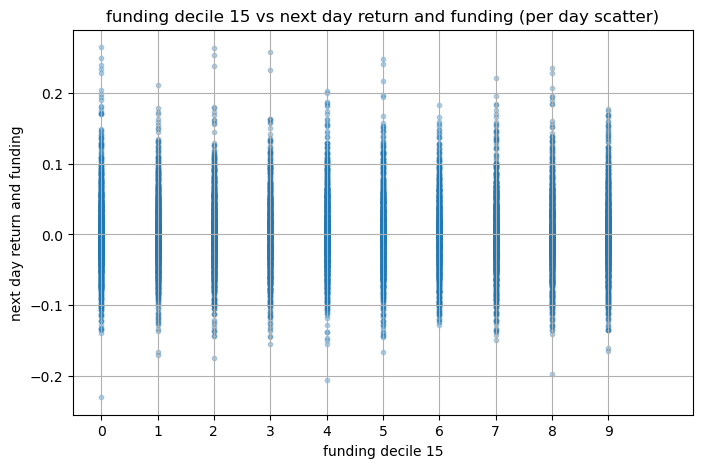

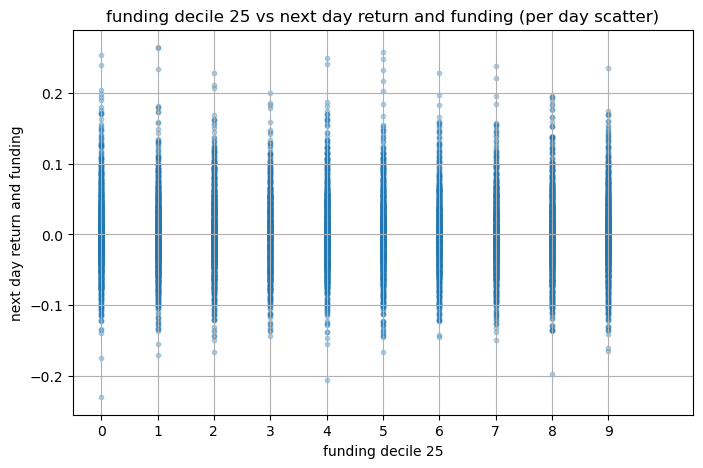

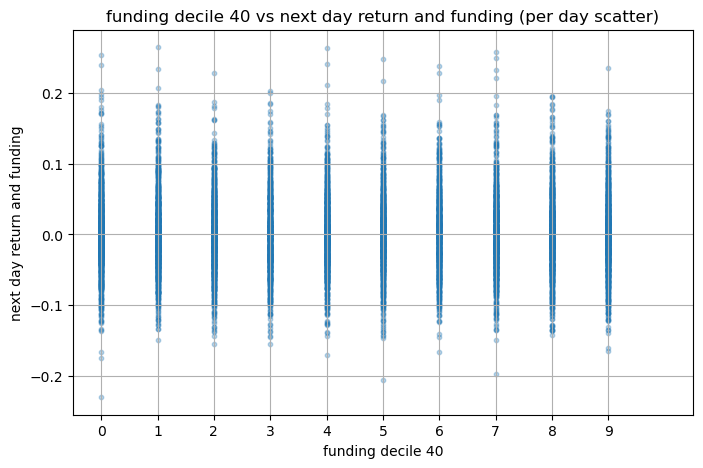

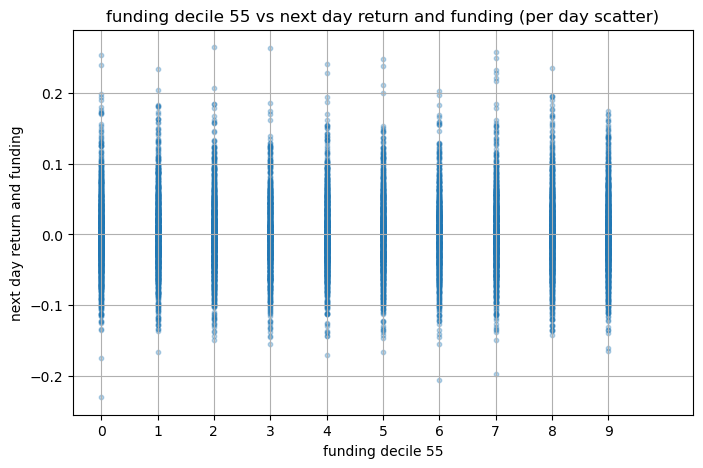

In [14]:
# scatter plot to gain initial intuiton
for i in [1, 3, 5, 10, 15, 25, 40, 55]:

    plt.figure(figsize=(8,5))
    plt.scatter(
        df[f"funding_decile{i}"], 
        df["next_returns_funding_volscaled"], 
        alpha=0.3, 
        s=10
    )

    plt.xlabel(f"funding decile {i}")
    plt.ylabel("next day return and funding")
    plt.title(f"funding decile {i} vs next day return and funding (per day scatter)")
    plt.grid(True)

    plt.xlim(-0.5, 10.5)
    plt.xticks(range(0, 10))
    plt.show()

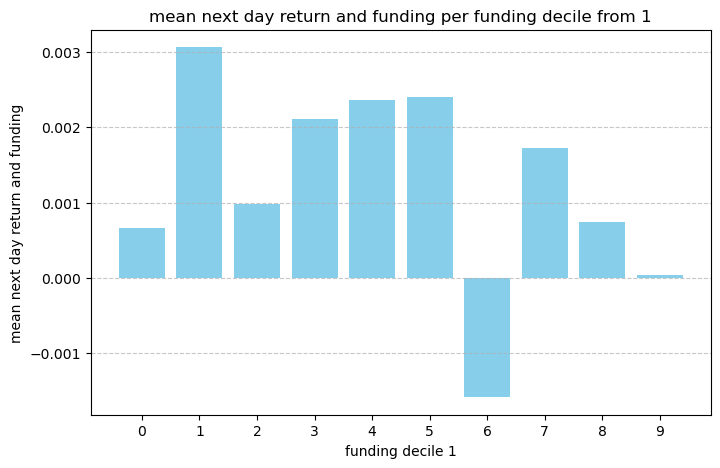

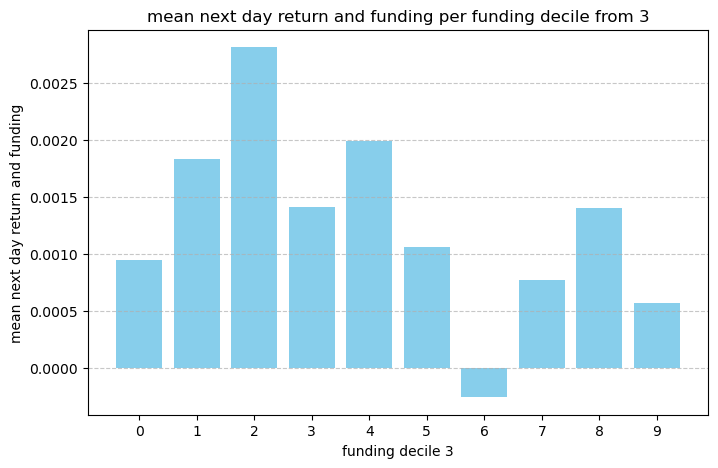

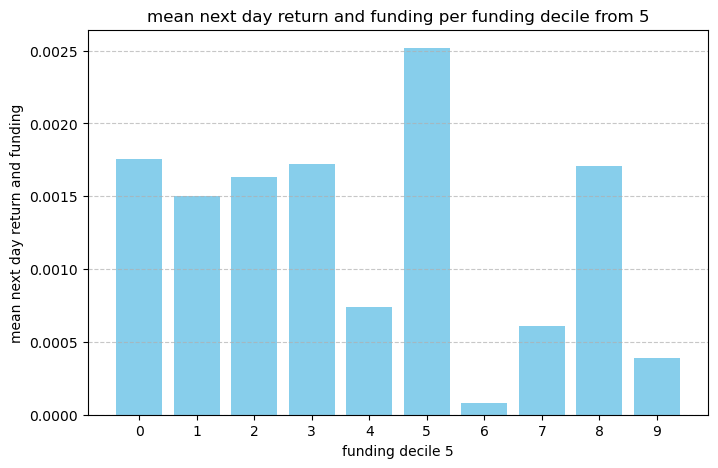

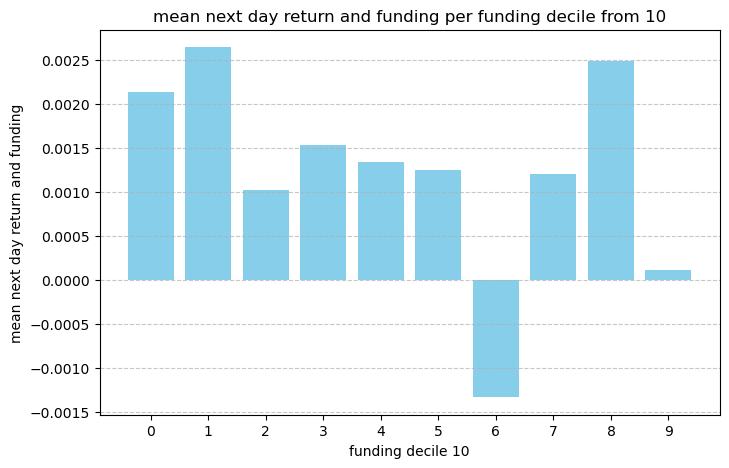

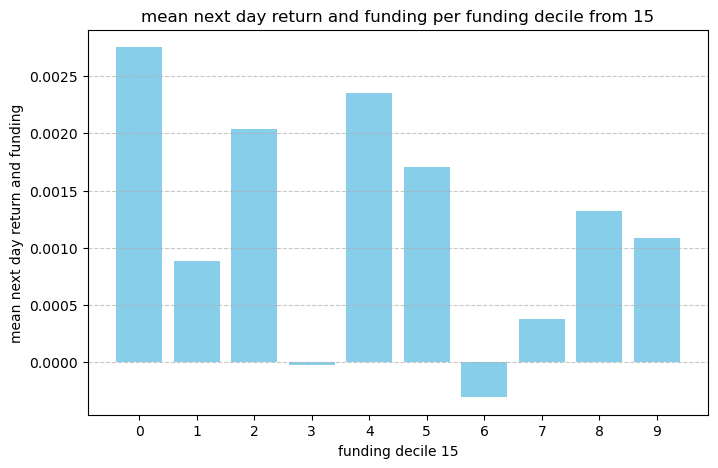

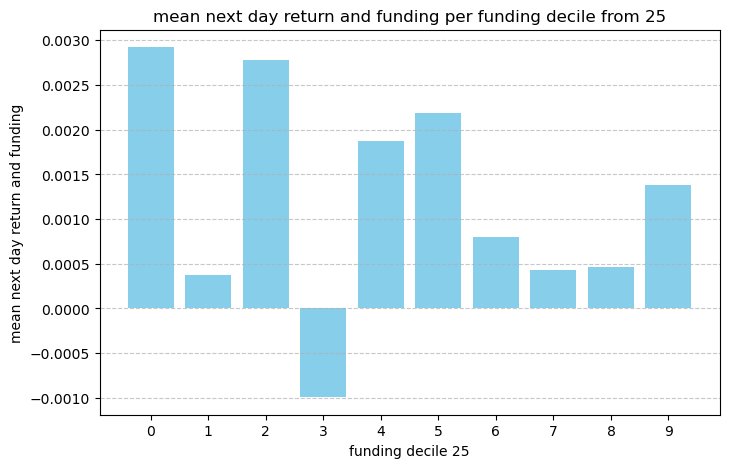

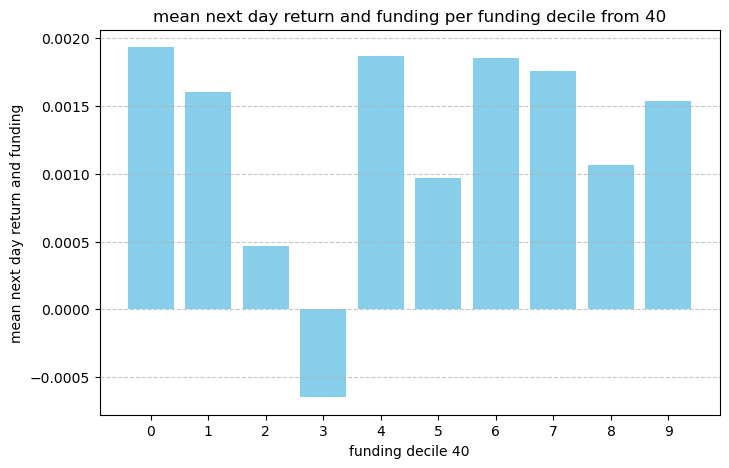

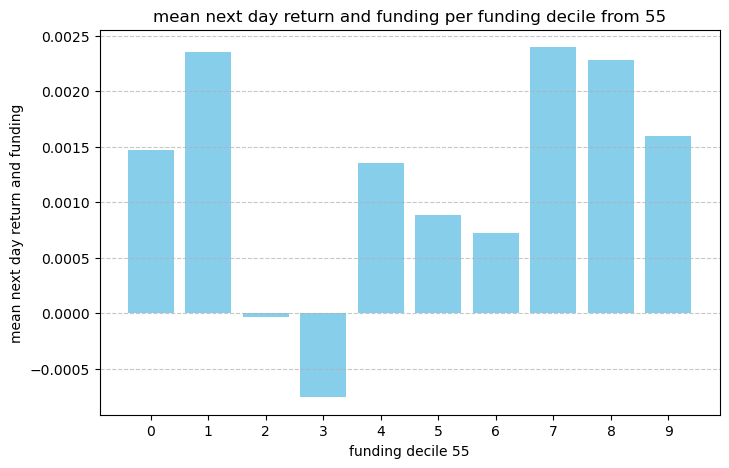

In [15]:
# decile plot to aim to see effects more clearly
for i in [1, 3, 5, 10, 15, 25, 40, 55]:

    decile_means = df.groupby(f"funding_decile{i}")["next_returns_funding_volscaled"].mean()

    plt.figure(figsize=(8,5))
    plt.bar(decile_means.index, decile_means.values, color="skyblue")
    plt.xlabel(f"funding decile {i}")
    plt.ylabel("mean next day return and funding")
    plt.title(f"mean next day return and funding per funding decile from {i}")
    plt.xticks(decile_means.index)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()